## RNN/CNN to predict LES snow

**Goal**

Use the LES image data to predict LES snow.

## Import Libs

In [ ]:
import os
import pandas as pd
import numpy as np
import ast  # convert the big string into actual data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

# tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import mnist  # Test datasets
from tensorflow.keras.utils import to_categorical

## Import Data

**Lat_lon data for plotting 1D image**

In [ ]:
les = pd.read_csv('/data/project neural/combined.csv')
les.head(5)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,18:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",51.0,92.0,...,3700,m,m,10,984.4,1007.20,1007.10,0.00,NC,NC
1,2006-10-01,01:00,2006-09-30,19:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48.0,96.0,...,3700,m,m,10,984.7,1007.80,1007.50,0.00,NC,NC
2,2006-10-01,02:00,2006-09-30,20:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",49.0,92.0,...,3700,m,m,10,985.4,1008.30,1008.10,0.00,NC,NC
3,2006-10-01,03:00,2006-09-30,21:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,100.0,...,2500,6500,m,6,986.0,M,1008.80,0.02,NC,NC
4,2006-10-01,04:00,2006-09-30,22:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",50.0,92.0,...,7000,m,m,8,986.4,1009.50,1009.10,0.00,NC,NC


In [ ]:
 df_lat_lon = pd.read_csv('/data/project neural/lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


In [ ]:
df_lat_lon.shape

(3599, 2)

Get latitude and longitude lists.

In [ ]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

(lat_lst, lon_lst)

([41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.78,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.82,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.86,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.9,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,
  41.94,

**LES data**

In [ ]:
df_data = les
df_data.head(20)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,18:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",51.0,92.0,...,3700,m,m,10,984.4,1007.20,1007.10,0.00,NC,NC
1,2006-10-01,01:00,2006-09-30,19:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48.0,96.0,...,3700,m,m,10,984.7,1007.80,1007.50,0.00,NC,NC
2,2006-10-01,02:00,2006-09-30,20:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",49.0,92.0,...,3700,m,m,10,985.4,1008.30,1008.10,0.00,NC,NC
3,2006-10-01,03:00,2006-09-30,21:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,100.0,...,2500,6500,m,6,986.0,M,1008.80,0.02,NC,NC
4,2006-10-01,04:00,2006-09-30,22:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",50.0,92.0,...,7000,m,m,8,986.4,1009.50,1009.10,0.00,NC,NC
5,2006-10-01,05:00,2006-09-30,23:00,goes11.2006.10.01.0500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0500.v01.nc-var1-t0.csv.csv,"[nan, nan, 0.0075, nan, nan, 0.0025, 0.0025, 0...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",49.0,96.0,...,7000,m,m,7,986.7,1009.80,1009.50,0.00,NC,NC
6,2006-10-01,06:00,2006-10-01,00:00,goes11.2006.10.01.0600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0600.v01.nc-var1-t0.csv.csv,"[nan, 0.0, 0.0075, 0.005, 0.0025, 0.005, 0.005...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",50.0,92.0,...,6500,m,m,9,987.3,1010.20,1010.20,0.01,NC,NC
7,2006-10-01,07:00,2006-10-01,01:00,goes11.2006.10.01.0700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0700.v01.nc-var1-t0.csv.csv,"[nan, 0.0025, 0.005, 0.0025, nan, nan, nan, 0....","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,92.0,...,0,m,m,9,988.0,1010.80,1010.80,0.00,NC,NC
8,2006-10-01,08:00,2006-10-01,02:00,None,None,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[nan],45.0,100.0,...,M,m,m,5,988.3,M,1011.20,m,NC,NC
9,2006-10-01,09:00,2006-10-01,03:00,None,None,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[nan],43.0,100.0,...,4200,m,m,5,989.0,M,1011.90,m,NC,NC


In [ ]:
df_data.shape

(48121, 24)

## Process Data

We will not use the data during night time. Use the rows during time between 14:00 UTC and 21:00 UTC, when there are enough sunlight. 

Drop rows where the time is before 14:00 or after 21:00.

In [ ]:
import time
start = time.strptime("14:00", "%H:%M")
end = time.strptime("21:00", "%H:%M")

In [ ]:
df_data = df_data.drop(df_data[df_data["Time_UTC"].map(lambda x : (time.strptime(x, "%H:%M") < start)|(time.strptime(x, "%H:%M") > end))].index)
df_data.head(20)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
14,2006-10-01,14:00,2006-10-01,08:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",48.0,92.0,...,3600,m,m,10,993.0,1016.30,1015.90,0.00,NC,NC
15,2006-10-01,15:00,2006-10-01,09:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",55.0,59.0,...,3600,m,m,10,993.7,1016.90,1016.60,0.00,NC,NC
16,2006-10-01,16:00,2006-10-01,10:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",55.0,61.0,...,3600,m,m,10,994.3,1017.50,1017.30,0.00,NC,NC
17,2006-10-01,17:00,2006-10-01,11:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",58.0,55.0,...,3600,m,m,10,995.0,1018.00,1017.90,0.00,NC,NC
18,2006-10-01,18:00,2006-10-01,12:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",56.0,59.0,...,3600,m,m,10,995.0,1018.10,1017.90,0.00,NC,NC
19,2006-10-01,19:00,2006-10-01,13:00,goes11.2006.10.01.1900.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1900.v01.nc-var1-t0.csv.csv,"[0.0925, 0.095, 0.0925, 0.074999996, 0.0875, 0...","[array([ nan, nan, nan, nan, nan...",60.0,53.0,...,3800,m,m,10,994.7,1017.90,1017.60,0.00,NC,NC
20,2006-10-01,20:00,2006-10-01,14:00,goes11.2006.10.01.2000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.2000.v01.nc-var1-t0.csv.csv,"[0.099999994, 0.095, 0.0975, 0.099999994, 0.11...","[array([ nan, nan, nan, nan, nan, nan, n...",60.0,49.0,...,3600,m,m,10,994.7,1017.80,1017.60,0.00,NC,NC
21,2006-10-01,21:00,2006-10-01,15:00,goes11.2006.10.01.2100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.2100.v01.nc-var1-t0.csv.csv,"[0.11, 0.105, 0.0975, 0.107499994, 0.099999994...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,m,m,10,994.7,1017.70,1017.60,0.00,NC,NC
38,2006-10-02,14:00,2006-10-02,08:00,goes11.2006.10.02.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.02.1400.v01.nc-var1-t0.csv.csv,"[0.37, 0.325, 0.2575, 0.2075, 0.2175, 0.295, 0...","[array([ nan, nan, nan, nan, nan, n...",66.0,65.0,...,8000,m,m,10,991.0,1013.90,1013.90,0.00,NC,NC
39,2006-10-02,15:00,2006-10-02,09:00,goes11.2006.10.02.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.02.1500.v01.nc-var1-t0.csv.csv,"[0.16, 0.285, 0.1925, 0.1925, 0.19749999, 0.16...","[array([ nan, nan, nan, nan, nan...",68.0,63.0,...,0,m,m,10,990.7,1013.60,1013.50,0.00,NC,NC


In [ ]:
df_data.shape

(16040, 24)

We need to generate the target categorical labels that represent snow fall. 

As the temperature will drop suddenly and the wind direction will change suddenly when snow, we will mark the row with **Temp (F)** equal or below *32F* and **hourly precipitation** larger than *0* as snow. 

Before generate the label, we need to find whether there are missing values in thoes features and drop those rows.

In [ ]:
null_value = ["m", "M", "NC", "NaNs"]

def check_missing(df):
    for col in df.columns:
        print(len(df[df[col].map(lambda x : x in null_value)]), " : {}".format(col))
        
check_missing(df_data)

0  : Date_UTC
0  : Time_UTC
0  : Date_CST
0  : Time_CST
0  : File_name_for_1D_lake
0  : File_name_for_2D_lake
0  : Lake_data_1D
0  : Lake_data_2D
12  : Temp (F)
12  : RH (%)
8  : Dewpt (F)
46  : Wind Spd (mph)
1631  : Wind Direction (deg)
12116  : Peak Wind Gust(mph)
140  : Low Cloud Ht (ft)
7795  : Med Cloud Ht (ft)
13709  : High Cloud Ht (ft)
154  : Visibility (mi)
33  : Atm Press (hPa)
973  : Sea Lev Press (hPa)
8  : Altimeter (hPa)
815  : Precip (in)
5347  : Wind Chill (F)
15905  : Heat Index (F)


In [ ]:
df_data = df_data.drop(df_data[df_data["Temp (F)"].map(lambda x : x in null_value)].index)
df_data = df_data.drop(df_data[df_data["Precip (in)"].map(lambda x : x in null_value)].index)
df_data.shape

(15216, 24)

Check whether there are null.

In [ ]:
null_table = pd.DataFrame({
    'Unique': df_data.nunique(),
    'Null': df_data.isnull().sum(),
    'NullPercent': df_data.isnull().sum() / len(df_data),
    'NaNN': df_data.isna().sum(),
    'Type': df_data.dtypes.values,
})

null_table

,Unique,Null,NullPercent,NaNN,Type
Date_UTC,2002,0,0.000000,0,object
Time_UTC,8,0,0.000000,0,object
Date_CST,2002,0,0.000000,0,object
Time_CST,8,0,0.000000,0,object
File_name_for_1D_lake,14234,0,0.000000,0,object
File_name_for_2D_lake,14234,0,0.000000,0,object
Lake_data_1D,12251,0,0.000000,0,object
Lake_data_2D,12252,0,0.000000,0,object
Temp (F),196,81,0.005323,81,object
RH (%),165,81,0.005323,81,object


In [ ]:
df_data = df_data.dropna()

null_table = pd.DataFrame({
    'Unique': df_data.nunique(),
    'Null': df_data.isnull().sum(),
    'NullPercent': df_data.isnull().sum() / len(df_data),
    'NaNN': df_data.isna().sum(),
    'Type': df_data.dtypes.values,
})

null_table

,Unique,Null,NullPercent,NaNN,Type
Date_UTC,1992,0,0.0,0,object
Time_UTC,8,0,0.0,0,object
Date_CST,1992,0,0.0,0,object
Time_CST,8,0,0.0,0,object
File_name_for_1D_lake,14154,0,0.0,0,object
File_name_for_2D_lake,14154,0,0.0,0,object
Lake_data_1D,12171,0,0.0,0,object
Lake_data_2D,12172,0,0.0,0,object
Temp (F),196,0,0.0,0,object
RH (%),165,0,0.0,0,object


In [ ]:
df_data.shape

(15135, 24)

We need to use the picture representation in `Lake_data_1D` or `Lake_data_2D`. Check whether there are null values in those features.

In [ ]:
print(len(df_data[df_data["Lake_data_2D"].map(lambda x : x in ["[nan]"])]), " : Lake_data_2D")

982  : Lake_data_2D


In [ ]:
df_data = df_data.drop(df_data[df_data["Lake_data_2D"].map(lambda x : x in ["[nan]"])].index)
df_data.shape

(14153, 24)

Now we can set the `LES_snow` label.

In [ ]:
df_data["LES_snow"] = 0
df_data.loc[(df_data['Temp (F)'].astype(float) <= 32.0) & (df_data['Precip (in)'].astype(float) > 0.0), "LES_snow"] = 1
df_data["LES_snow"].value_counts()

0    13829
1      324
Name: LES_snow, dtype: int64

As we want to predict the snow in a day, we will mark the `LES_snow` as Y in a whole day if there is a snow during the day.

In [ ]:
date_set = set()
# get date with snow
for index, row in df_data.iterrows():
    if row["LES_snow"] == 1:
        date_set.add(row["Date_UTC"])

# mark the date with snow
for d in date_set:
    df_data.loc[df_data["Date_UTC"].eq(d), 'LES_snow'] = 1
    
df_data["LES_snow"].value_counts()

0    12889
1     1264
Name: LES_snow, dtype: int64

In [ ]:
df_data.shape

(14153, 25)

In [ ]:
df_data.head(30)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),LES_snow
14,2006-10-01,14:00,2006-10-01,08:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",48.0,92.0,...,m,m,10,993.0,1016.30,1015.90,0.00,NC,NC,0
15,2006-10-01,15:00,2006-10-01,09:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",55.0,59.0,...,m,m,10,993.7,1016.90,1016.60,0.00,NC,NC,0
16,2006-10-01,16:00,2006-10-01,10:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",55.0,61.0,...,m,m,10,994.3,1017.50,1017.30,0.00,NC,NC,0
17,2006-10-01,17:00,2006-10-01,11:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",58.0,55.0,...,m,m,10,995.0,1018.00,1017.90,0.00,NC,NC,0
18,2006-10-01,18:00,2006-10-01,12:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",56.0,59.0,...,m,m,10,995.0,1018.10,1017.90,0.00,NC,NC,0
19,2006-10-01,19:00,2006-10-01,13:00,goes11.2006.10.01.1900.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1900.v01.nc-var1-t0.csv.csv,"[0.0925, 0.095, 0.0925, 0.074999996, 0.0875, 0...","[array([ nan, nan, nan, nan, nan...",60.0,53.0,...,m,m,10,994.7,1017.90,1017.60,0.00,NC,NC,0
20,2006-10-01,20:00,2006-10-01,14:00,goes11.2006.10.01.2000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.2000.v01.nc-var1-t0.csv.csv,"[0.099999994, 0.095, 0.0975, 0.099999994, 0.11...","[array([ nan, nan, nan, nan, nan, nan, n...",60.0,49.0,...,m,m,10,994.7,1017.80,1017.60,0.00,NC,NC,0
21,2006-10-01,21:00,2006-10-01,15:00,goes11.2006.10.01.2100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.2100.v01.nc-var1-t0.csv.csv,"[0.11, 0.105, 0.0975, 0.107499994, 0.099999994...","[array([ nan, nan, nan, ...",60.0,47.0,...,m,m,10,994.7,1017.70,1017.60,0.00,NC,NC,0
38,2006-10-02,14:00,2006-10-02,08:00,goes11.2006.10.02.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.02.1400.v01.nc-var1-t0.csv.csv,"[0.37, 0.325, 0.2575, 0.2075, 0.2175, 0.295, 0...","[array([ nan, nan, nan, nan, nan, n...",66.0,65.0,...,m,m,10,991.0,1013.90,1013.90,0.00,NC,NC,0
39,2006-10-02,15:00,2006-10-02,09:00,goes11.2006.10.02.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.02.1500.v01.nc-var1-t0.csv.csv,"[0.16, 0.285, 0.1925, 0.1925, 0.19749999, 0.16...","[array([ nan, nan, nan, nan, nan...",68.0,63.0,...,m,m,10,990.7,1013.60,1013.50,0.00,NC,NC,0


We want to predict the snow based on the image. So we choose the data frame with `Time_UTC`, `Lake_data` and `LES_snow`.

In [ ]:
df_data = df_data[["Date_UTC", "Time_UTC", "Lake_data_1D", "Lake_data_2D", "LES_snow"]]
df_data

,Date_UTC,Time_UTC,Lake_data_1D,Lake_data_2D,LES_snow
14,2006-10-01,14:00,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",0
15,2006-10-01,15:00,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",0
16,2006-10-01,16:00,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",0
17,2006-10-01,17:00,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",0
18,2006-10-01,18:00,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",0
...,...,...,...,...,...
48114,2017-03-31,17:00,"[0.72499996, 0.745, 0.73249996, 0.78749996, 0....","[array([ nan, nan, nan, nan, nan, nan, n...",0
48115,2017-03-31,18:00,"[0.72749996, 0.7525, 0.74, 0.7075, 0.715, 0.73...","[array([ nan, nan, nan, nan, nan...",0
48116,2017-03-31,19:00,"[0.75, 0.78249997, 0.805, 0.78999996, 0.789999...","[array([ nan, nan, nan, nan, nan...",0
48117,2017-03-31,20:00,"[0.76, 0.675, 0.72249997, 0.7175, 0.73249996, ...","[array([ nan, nan, nan, nan, nan...",0


In [ ]:
df_data

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,18:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",51.0,92.0,...,3700,m,m,10,984.4,1007.20,1007.10,0.00,NC,NC
1,2006-10-01,01:00,2006-09-30,19:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48.0,96.0,...,3700,m,m,10,984.7,1007.80,1007.50,0.00,NC,NC
2,2006-10-01,02:00,2006-09-30,20:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",49.0,92.0,...,3700,m,m,10,985.4,1008.30,1008.10,0.00,NC,NC
3,2006-10-01,03:00,2006-09-30,21:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,100.0,...,2500,6500,m,6,986.0,M,1008.80,0.02,NC,NC
4,2006-10-01,04:00,2006-09-30,22:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",50.0,92.0,...,7000,m,m,8,986.4,1009.50,1009.10,0.00,NC,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48116,2017-03-31,19:00,2017-03-31,13:00,goes15.2017.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2017.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.75, 0.78249997, 0.805, 0.78999996, 0.789999...","[array([ nan, nan, nan, nan, nan...",39,75,...,2100,m,m,10,989.00,1012.30,1011.90,0.00,32,NC
48117,2017-03-31,20:00,2017-03-31,14:00,goes15.2017.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2017.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.76, 0.675, 0.72249997, 0.7175, 0.73249996, ...","[array([ nan, nan, nan, nan, nan...",40,73,...,2200,m,m,10,989.30,1012.60,1012.20,0.00,34,NC
48118,2017-03-31,21:00,2017-03-31,15:00,goes15.2017.03.31.2100.v01.nc-var1-t0.csv,T_goes15.2017.03.31.2100.v01.nc-var1-t0.csv.csv,"[0.6225, 0.6375, 0.6525, 0.66499996, 0.6725, 0...","[array([ nan, nan, nan, nan, nan...",41,70,...,2600,3000,3700,10,989.70,1013.10,1012.50,0.00,36,NC
48119,2017-03-31,22:00,2017-03-31,16:00,goes15.2017.03.31.2200.v01.nc-var1-t0.csv,T_goes15.2017.03.31.2200.v01.nc-var1-t0.csv.csv,"[0.4325, 0.45999998, 0.4725, 0.465, 0.45, 0.44...","[array([ nan, nan, nan, nan, nan...",42,67,...,2700,4700,6000,10,990.00,1013.50,1012.90,0.00,38,NC


In [ ]:
data_sample = df_data['Lake_data_1D'][23]
data_sample

'[0.04, 0.0425, 0.044999998, 0.04, 0.04, 0.0475, 0.0475, 0.04, 0.0425, 0.049999997, 0.0425, 0.044999998, 0.044999998, 0.044999998, 0.04, 0.04, 0.049999997, 0.044999998, 0.044999998, 0.04, 0.044999998, 0.049999997, 0.04, 0.0475, 0.055, 0.0475, 0.0475, 0.0525, 0.049999997, 0.0525, 0.049999997, 0.0475, 0.0425, 0.055, 0.037499998, 0.044999998, 0.049999997, 0.0475, 0.0475, 0.044999998, 0.049999997, 0.04, 0.0525, 0.0475, 0.049999997, 0.044999998, 0.044999998, 0.044999998, 0.044999998, 0.044999998, 0.04, 0.049999997, 0.044999998, 0.044999998, 0.0525, 0.0475, 0.044999998, 0.0475, 0.04, 0.04, 0.0425, 0.04, 0.044999998, 0.049999997, 0.0475, 0.049999997, 0.04, 0.044999998, 0.0475, 0.044999998, 0.049999997, 0.0475, 0.0475, 0.049999997, 0.0475, 0.0475, 0.049999997, 0.044999998, 0.04, 0.044999998, 0.04, 0.044999998, 0.0475, 0.044999998, 0.0475, 0.055, 0.0525, 0.0425, 0.0475, 0.0425, 0.044999998, 0.04, 0.044999998, 0.049999997, 0.044999998, 0.049999997, 0.049999997, 0.044999998, 0.04, 0.044999998, 0.

In [ ]:
import ast

data_sample = ast.literal_eval(data_sample)
data_sample

[0.04,
 0.0425,
 0.044999998,
 0.04,
 0.04,
 0.0475,
 0.0475,
 0.04,
 0.0425,
 0.049999997,
 0.0425,
 0.044999998,
 0.044999998,
 0.044999998,
 0.04,
 0.04,
 0.049999997,
 0.044999998,
 0.044999998,
 0.04,
 0.044999998,
 0.049999997,
 0.04,
 0.0475,
 0.055,
 0.0475,
 0.0475,
 0.0525,
 0.049999997,
 0.0525,
 0.049999997,
 0.0475,
 0.0425,
 0.055,
 0.037499998,
 0.044999998,
 0.049999997,
 0.0475,
 0.0475,
 0.044999998,
 0.049999997,
 0.04,
 0.0525,
 0.0475,
 0.049999997,
 0.044999998,
 0.044999998,
 0.044999998,
 0.044999998,
 0.044999998,
 0.04,
 0.049999997,
 0.044999998,
 0.044999998,
 0.0525,
 0.0475,
 0.044999998,
 0.0475,
 0.04,
 0.04,
 0.0425,
 0.04,
 0.044999998,
 0.049999997,
 0.0475,
 0.049999997,
 0.04,
 0.044999998,
 0.0475,
 0.044999998,
 0.049999997,
 0.0475,
 0.0475,
 0.049999997,
 0.0475,
 0.0475,
 0.049999997,
 0.044999998,
 0.04,
 0.044999998,
 0.04,
 0.044999998,
 0.0475,
 0.044999998,
 0.0475,
 0.055,
 0.0525,
 0.0425,
 0.0475,
 0.0425,
 0.044999998,
 0.04,
 0.044999

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig(fig_name+'.png')
        status_code = 0
    else:
        status_code = 255

    return status_code


0

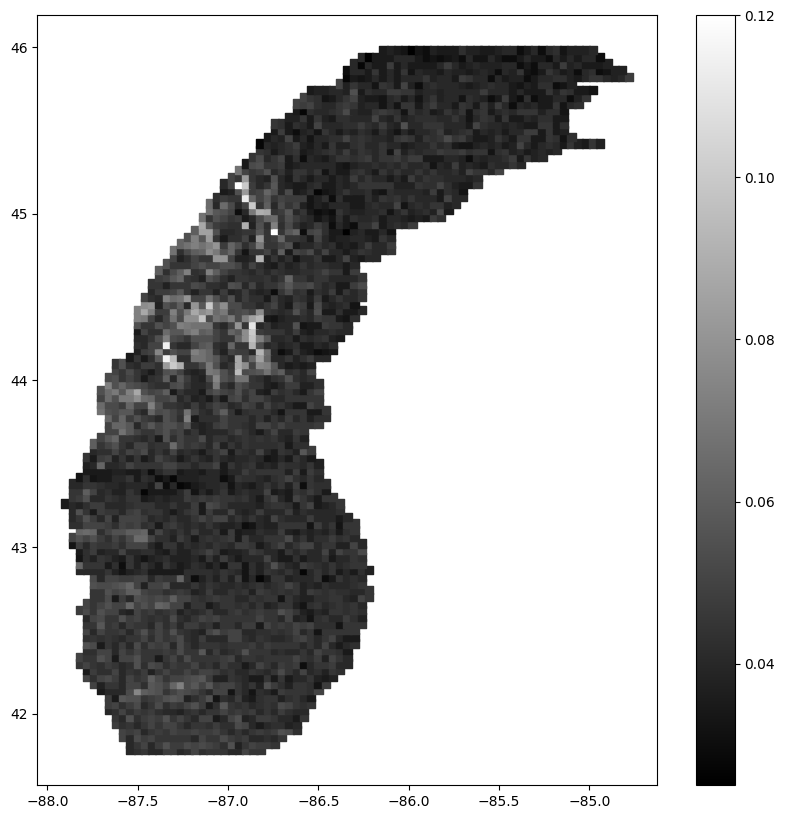

In [ ]:
return_code = arrays_2_png(lat_lst, lon_lst, data_sample, 'sample')
return_code

## CNN Tensorflow

### Construct Train&Test data

Convert `Lake_data_1D` to numpy array. Store the numpy array to use for training data.

In [ ]:
def ast_to_np(df):
    np_array = []
    for row in df:
        np_array.append(ast.literal_eval(row.replace("nan", "0.0")))
    return np.array(np_array)

In [ ]:
lake_data_1D = ast_to_np(df_data["Lake_data_1D"])
lake_data_1D.shape 

(14153, 3599)

Try split train & test with 50%.

In [ ]:
split_per = 0.5
split_num = int(df_data.shape[0] * split_per)

train_images = lake_data_1D[:split_num]
train_labels = df_data["LES_snow"][:split_num]
test_images = lake_data_1D[split_num:]
test_labels = df_data["LES_snow"][split_num:]

In [ ]:
(train_images.shape, train_labels.shape, test_images.shape,test_labels.shape)

((7076, 3599), (7076,), (7077, 3599), (7077,))

Reshape training data

In [ ]:
train_images = train_images.tolist()
for row in train_images:
    row.append(0.0)
train_images = np.array(train_images)
    
test_images = test_images.tolist()
for row in test_images:
    row.append(0.0)
test_images = np.array(test_images)
    
(train_images.shape, test_images.shape)

((7076, 3600), (7077, 3600))

In [ ]:
train_images = train_images.reshape((7076, 60, 60, 1))
test_images = test_images.reshape((7077, 60, 60, 1))
(train_images.shape, test_images.shape)

((7076, 60, 60, 1), (7077, 60, 60, 1))

### Build the model

In [ ]:
# TODO
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

Add dense layers.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, 10)

test_labels = to_categorical(test_labels, 10)

train_labels.shape

(7076, 10)

### Compile and train model

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_images, train_labels, epochs=6, batch_size=64)

Epoch 1/6
111/111 [==============================] - 16s 137ms/step - loss: 0.4495 - accuracy: 0.8867
Epoch 2/6
111/111 [==============================] - 14s 129ms/step - loss: 0.3444 - accuracy: 0.8966
Epoch 3/6
111/111 [==============================] - 15s 131ms/step - loss: 0.3381 - accuracy: 0.8966
Epoch 4/6
111/111 [==============================] - 15s 132ms/step - loss: 0.3288 - accuracy: 0.8966
Epoch 5/6
111/111 [==============================] - 15s 133ms/step - loss: 0.3303 - accuracy: 0.8966
Epoch 6/6
111/111 [==============================] - 15s 133ms/step - loss: 0.3253 - accuracy: 0.8966


### Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

222/222 [==============================] - 4s 15ms/step - loss: 0.2790 - accuracy: 0.9248
test_loss: 0.27899694442749023
test_acc: 0.9248269200325012
